<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico -> Grupo 7_2</h1>

#### Borgnino Leandro   
#### Bornancini Verónica  
#### Debate Pablo   
#### Fernandez María Soledad   
#### Olariaga Sandra Mónica   
#### Saurit Lucas   

<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols][:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                   int64
ISO_code                              object
countries                             object
region                                object
hf_score                              object
hf_rank                               object
hf_quartile                           object
pf_rol_procedural                     object
pf_rol_civil                          object
pf_rol_criminal                       object
pf_rol                                object
pf_ss_homicide                        object
pf_ss_disappearances_disap            object
pf_ss_disappearances_violent          object
pf_ss_disappearances_organized        object
pf_ss_disappearances_fatalities       object
pf_ss_disappearances_injuries         object
pf_ss_disappearances                  object
pf_ss_women_fgm                       object
pf_ss_women_inheritance_widows        object
pf_ss_women_inheritance_daughters     object
pf_ss_women_inheritance               object
pf_ss_wome

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0


In [9]:
dataset.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# **Parte 1**

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## **1 Estadísticos descriptivos**

###  **1.1** Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [10]:
import numpy as np

def rango(var):
    print(score_col + ' -> '+ str(var.max()), "-", str(var.min()),"=",str(var.max()- var.min()))
    
print("Rango de las variables")
print("Variable -> max - min = rango")   

for score_col in score_cols:
    rango(dataset[score_col])

Rango de las variables
Variable -> max - min = rango
pf_identity_legal -> 10.0 - 0.0 = 10.0
pf_identity_sex_male -> 10.0 - 0.0 = 10.0
pf_identity_sex_female -> 10.0 - 0.0 = 10.0
pf_identity_sex -> 10.0 - 0.0 = 10.0
pf_identity_divorce -> 10.0 - 0.0 = 10.0
pf_identity -> 10.0 - 0.0 = 10.0
pf_score -> 9.56 - 2.22 = 7.34
pf_rank -> 162.0 - 1.0 = 161.0
ef_score -> 9.11 - 2.58 = 6.529999999999999
ef_rank -> 162.0 - 1.0 = 161.0
hf_score -> 9.12 - 3.69 = 5.43
hf_rank -> 162.0 - 1.0 = 161.0


**NOTA:**    
**a)** La variable **pf_identity** en todas sus variantes posee el mismo rango.     
**b)** La variable **hf_score** posee un rango mucho menor que **pf_identity**, por lo tanto los valores de los registros estarán menos dispersos.

### **1.2** Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

**NOTA:**   
**a)** Una forma práctica de comparar un país con otro es mediante gráficos. Presentaremos la comparación de paises correspondientes a Latinoamérica y el Caribe (latam).   
**b)** Compararíamos los paises teniendo en cuenta la **mediana**, ya que es un valor que no se ve influenciado por valores extremos. Una vez ordenados los valores se tiene la misma cantidad de elementos por debajo de la mediana que por encima, por lo tanto me permitiría hacer una comparación sin el problema de los outliers.

In [11]:
dataset.region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [12]:
import pandas as pd

# latam hará referencia  la base de datos para Latinoamérica y el caribe
# dataset seguirá siendo el nombre para la base de datos del mundo

latam = dataset[(dataset.region == "Latin America & the Caribbean")]
latam[:3]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0


C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


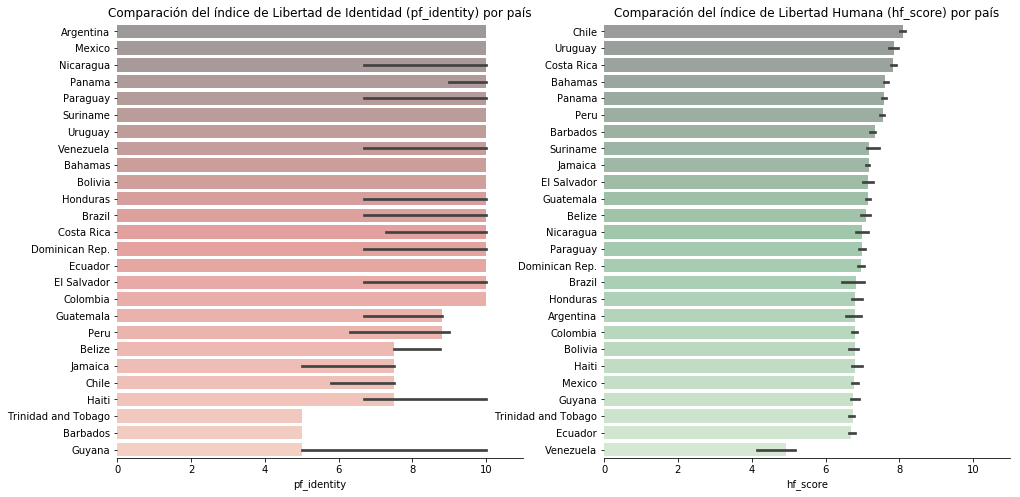

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(16,8))

plt.subplot(121)

#plt1= dataset.sort_values(['pf_identity']).reset_index(drop=True)
plt1 = latam.iloc[(-latam.groupby('countries')['pf_identity'].transform('median')).argsort()]
seaborn.barplot(data=plt1, x='pf_identity', y='countries',   palette='Reds_d', alpha=0.5, estimator=np.median)
plt.ylabel('')
plt.xlabel('pf_identity')
plt.xlim(0,11)
plt.title('Comparación del índice de Libertad de Identidad (pf_identity) por país')
seaborn.despine(left=True)

plt.subplot(122)

plt2 = latam.iloc[(-latam.groupby('countries')['hf_score'].transform('median')).argsort()]
seaborn.barplot(data=plt2, x='hf_score', y='countries',  palette='Greens_d', alpha=0.5, estimator=np.median)
plt.ylabel('')
plt.xlabel('hf_score')
plt.xlim(0,11)
plt.title('Comparación del índice de Libertad Humana (hf_score) por país')
seaborn.despine(left=True)

**NOTA:**    
**a)** Los paises con menor **pf_identity** (índice de libertad de identidad) son Barbados, Guyana y Trinidad y Tobago. Argentina esta ubicado dentro de los paises con mejor Indice.     
**b)** El país con menor **hf_score** (índice de libertad humana) es Venezuela. Por el contrario, Chile es el país con el índice mas alto. Argentina se encuentra entre los diez países con menor índice de libertad humana de Latinoamerica.

### **1.3** Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [14]:
import numpy as np
import pandas as pd

print('ESTADÍSTICOS DESCRIPTIVOS PARA LATAM')
print('Latam, pf_identity, Media = '+ str(np.mean(latam.pf_identity)))
print('Latam, pf_identity, Mediana = '+ str(np.median(latam.pf_identity.dropna())))
print('Latam, pf_identity, Dev.Est. = '+ str(np.std(latam.pf_identity)))

print('Latam, hf_score, Media = '+ str(np.mean(latam.hf_score)))
print('Latam, hf_score, Mediana = '+ str(np.median(latam.hf_score.dropna())))
print('Latam, hf_score, Dev.Est. = '+ str(np.std(latam.hf_score)))

print('ESTADÍSTICOS DESCRIPTIVOS PARA MUNDO')

print('Mundo, pf_identity, Media = '+ str(np.mean(dataset.pf_identity)))
print('Mundo, pf_identity, Mediana = '+ str(np.median(dataset.pf_identity.dropna())))
print('Mundo, pf_identity, Dev.Est. = '+ str(np.std(dataset.pf_identity)))

print('Mundo, hf_score, Media = '+ str(np.mean(dataset.hf_score)))
print('Mundo, hf_score, Mediana = '+ str(np.median(dataset.hf_score.dropna())))
print('Mundo, hf_score, Dev.Est. = '+ str(np.std(dataset.hf_score)))

ESTADÍSTICOS DESCRIPTIVOS PARA LATAM
Latam, pf_identity, Media = 8.582170542635659
Latam, pf_identity, Mediana = 10.0
Latam, pf_identity, Dev.Est. = 1.8721934908121116
Latam, hf_score, Media = 7.036976744186046
Latam, hf_score, Mediana = 7.02
Latam, hf_score, Dev.Est. = 0.6336654836706834
ESTADÍSTICOS DESCRIPTIVOS PARA MUNDO
Mundo, pf_identity, Media = 7.280649350649351
Mundo, pf_identity, Mediana = 8.8
Mundo, pf_identity, Dev.Est. = 3.1805438715105745
Mundo, hf_score, Media = 6.978214285714286
Mundo, hf_score, Mediana = 6.9
Mundo, hf_score, Dev.Est. = 1.0558962430843073


**NOTA:**   
**a)** Se observa para ambas variables, que los datos están menos dispersos en **latam** que en el **mundo**, teniendo en cuenta el desvio estandar y el rango calculado anteriormente.   
**b)** Por lo tanto una menor dispersion genera un valor de media mas representativo en el set de datos para latam que los pertenecientes al mundo.   
**c)** Para la variable **pf_identity**, se observa que en ambos casos **latam** y **mundo** el valor de la media es menor que el de la mediana , esto puede deberse al efecto de los datos extremos que traccionan el valor de la media. Al no coincidir los valores de media y mediana (media < mediana), se detecta una **asimetría negativa**, vemos que a priori podría ser una **distribución hipergeométrica** la que explica a este conjunto de datos.   
**d)** Para la variable **hf_score**, se observa para **latam** y **mundo** que el valor de la media es practicamente igual al de la mediana, por lo que a priori estos datos parecen tener una **distribución normal**.

### **1.4** ¿Tiene sentido calcular la moda?

**NOTA:**   
**a)** No tiene sentido calcular la **moda** ya que tenemos demasiados valores posibles en ambas variables, y esta metrica es mejor utilizarla para caracterizar variables categoricas.

### **1.5** ¿Cómo pueden sanearse los valores faltantes?

#### Chequeamos los registros nulos para el mundo

In [15]:
from IPython.display import display_html

# chequeo si hay nulos y si es así cuantos hay 
print("Cantidad de registris con pf_identity nulos: \t", dataset.pf_identity.isnull().sum())
print("Cantidad de registris con hf_score nulos: \t", dataset.hf_score.isnull().sum(), '\n')

# Buscamos en que países están los nulos 
ds_pf_identity = dataset[pandas.isnull(dataset['pf_identity'])][['countries', 'ISO_code']].groupby('countries').agg(['count'])
ds_hf_score = dataset[pandas.isnull(dataset['hf_score'])][['countries', 'ISO_code']].groupby('countries').agg(['count'])
ds_pf_identity_styler = ds_pf_identity.style.set_table_attributes("style='display:inline;padding-left:20px;'").set_caption('PF_IDENTITY NULOS')
ds_hf_score_styler = ds_hf_score.style.set_table_attributes("style='display:inline;'").set_caption('HF_SCORE NULOS')
display_html(ds_hf_score_styler._repr_html_()+ds_pf_identity_styler._repr_html_(), raw=True)

Cantidad de registris con pf_identity nulos: 	 80
Cantidad de registris con hf_score nulos: 	 80 



,ISO_code
,count
countries,
Belarus,8
Bhutan,5
Brunei Darussalam,2
Cambodia,2
Cape Verde,2
Eswatini,2
"Gambia, The",2
Guinea,5


#### Chequeamos los registros nulos para latam

In [16]:
from IPython.display import display_html

# Chequeo si hay nulos y si es así cuantos hay 
print("Cantidad de registris con pf_identity nulos: \t", latam.pf_identity.isnull().sum())
print("Cantidad de registris con hf_score nulos: \t", latam.hf_score.isnull().sum(), '\n')

# Buscamos en que países están los nulos 
ds_pf_identity = latam[pandas.isnull(latam['pf_identity'])][['countries', 'ISO_code']].groupby('countries').agg(['count'])
ds_hf_score = latam[pandas.isnull(latam['hf_score'])][['countries', 'ISO_code']].groupby('countries').agg(['count'])
ds_pf_identity_styler = ds_pf_identity.style.set_table_attributes("style='display:inline;padding-left:20px;'").set_caption('PF_IDENTITY NULOS')
ds_hf_score_styler = ds_hf_score.style.set_table_attributes("style='display:inline;'").set_caption('HF_SCORE NULOS')
display_html(ds_hf_score_styler._repr_html_()+ds_pf_identity_styler._repr_html_(), raw=True)

Cantidad de registris con pf_identity nulos: 	 2
Cantidad de registris con hf_score nulos: 	 2 



,ISO_code
,count
countries,
Suriname,2
,ISO_code
,count
countries,
Suriname,2


**NOTA:**    
**a)** Como tengo suficientes grados de libertad puedo quitar del análisis las filas que posean datos faltantes (nan) ya que aunque la base de datos se reduzca, me alcanzan los grados de libertad para los futuros análisis.   
**b)** Otra opción puede ser remplazar el nan por el valor de la media de esa variable. No es conveniente reemplazar por cero para que no tire la distribución hacia abajo.      
**c)** ANteriormente mostramos que paises tenian registos con datos nulos. A continuación haremos corroboraremos que las filas con datos faltantes sean las mismas en las dos variables con las que estamos trabajando. 
**d)** Elejimos la opcion de no tener en cuenta a las filas con datos nulos, **no las eliminamos** por las dudas las necesitemos luego. Vamos a obviar los valores nan por el momento.

In [17]:
# Obviamos los nan para la base de datos del mundo
import pandas as pd

dataset_notna = dataset[pd.notnull(dataset['pf_identity'])]
print(dataset_notna.pf_identity.isnull().sum())
print(dataset_notna.hf_score.isnull().sum())

0
0


**NOTA:**    
**a)** Si al dejar de lado los *registros nulos* para la variable **pf_identity**, también se dejan de lado todos los *registros nulos* para la variable **hf_score**, nos aseguramos de que los registros nulos para ambas variables eran los mismos. 

In [18]:
# Obviamos los nan para la base de datos de latam
import pandas as pd

latam_notna = latam[pd.notnull(latam['pf_identity'])]
print(latam_notna.pf_identity.isnull().sum())
print(latam_notna.hf_score.isnull().sum())

0
0


**NOTA:**    
**a)** Si al dejar de lado los *registros nulos* para la variable **pf_identity**, también se dejan de lado todos los *registros nulos* para la variable **hf_score**, nos aseguramos de que los registros nulos para ambas variables eran los mismos. 

### **1.6** ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

**NOTA:**   
**a)** Utilizando un **boxplot** es posible graficar distribuciones por grupos y ver si quedan valores sueltos (outliers) y si estos valores siguen algún ordenamiento.   
**b)** Mediante un gráfico de cajas se pueden observar los outliers que en un grafico de barras quedarian dentro de la barra de desviación estandar.   
**c)** En este caso si se observan los outliers agrupados dentro de las regiones. Un caso muy llamativo es el de *Oceanía* que parece tener ptacticamente todos sus registros como outlaiers.    
**d)** Decidimos filtrar los outlaiers utilizando la fórmula que deja solo aquellos valores que se encuentran a 2.5 desviaciones estandares de la media.

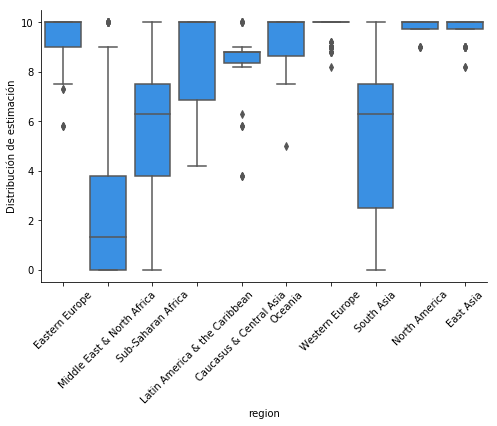

In [19]:
plt.figure(figsize=(8,5))
p1=seaborn.boxplot(data=dataset_notna, color='dodgerblue',
                x='region', y='pf_identity')
plt.ylabel('Distribución de estimación')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

In [20]:
# Filtrado de outliers 
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    mask_salarios_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]

In [21]:
dataset_clean = clean_outliers(dataset_notna, "pf_identity")
print("Filas removidas", len(dataset_notna) - len(dataset_clean))

Filas removidas 0


In [22]:
dataset_clean = clean_outliers(dataset_notna, "hf_score")
print("Filas removidas", len(dataset_notna) - len(dataset_clean))

Filas removidas 13


In [23]:
latam_clean = clean_outliers(latam_notna, "pf_identity")
print("Filas removidas", len(latam_notna) - len(latam_clean))

Filas removidas 0


In [24]:
latam_clean = clean_outliers(latam_notna, "hf_score")
print("Filas removidas", len(latam_notna) - len(latam_clean))

Filas removidas 10


In [25]:
# luego de la limpieza de valores nulos y de outliers calculamos cuantos registros en totales fueron filtrados

print("Total de filas filtradas")
print("Base de datos -> registros iniciales - registros finales = registros filtrados")
print("mundo -> ", str(len(dataset)), " - ", str(len(dataset_clean))," = ", len(dataset) - len(dataset_clean))
print("latam -> ", str(len(latam)), " - ", str(len(latam_clean))," = ", len(latam) - len(latam_clean))

Total de filas filtradas
Base de datos -> registros iniciales - registros finales = registros filtrados
mundo ->  1620  -  1527  =  93
latam ->  260  -  248  =  12


In [26]:
# Total outliers para pf_identity en el mundo= 0
# Total outliers para hf_score en el mundo = 13

# Implementamos la siguiente función para:
# Conocer cuales fueron los 13 registros filtrados para hf_score en el mundo
# Conocer cuales fueron los 10 registros filtrados para hf_score en latam
import numpy as np

def complement_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    complement = (
        np.abs(interesting_col-interesting_col.mean())>(2.5*interesting_col.std()))
    return dataset[complement]

In [27]:
dataset_removed = complement_outliers(dataset_notna, "hf_score")
latam_removed = complement_outliers(latam_notna, "hf_score")

(0, 5)

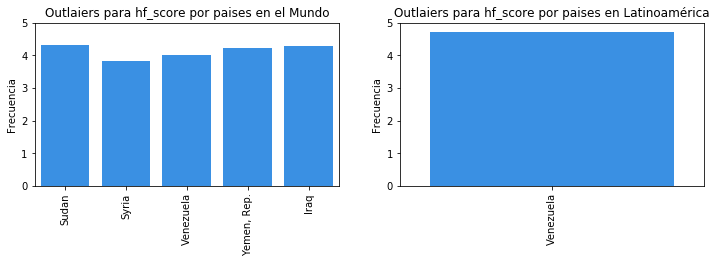

In [28]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(12,3))

plt.subplot(121)
plt1= dataset_removed.countries.value_counts(normalize=True)
seaborn.barplot (x=dataset_removed.countries,y= dataset_removed.hf_score, ci=None,  color='dodgerblue')
plt.xticks(rotation=90)
plt.title("Outlaiers para hf_score por paises en el Mundo")
plt.ylabel('Frecuencia')
plt.xlabel('')
plt.ylim(0,5)

plt.subplot(122)
plt1= latam_removed.countries.value_counts(normalize=True)
seaborn.barplot (x=latam_removed.countries,y= latam_removed.hf_score, ci=None, color='dodgerblue')
plt.xticks(rotation=90)
plt.title("Outlaiers para hf_score por paises en Latinoamérica")
plt.ylabel('Frecuencia')
plt.xlabel('')
plt.ylim(0,5)

**NOTA:**    
**a)** Los *outliers filtrados* para el **mundo** corresponden a registros de 5 paises.    
**b)** Podemos observar que los *outliers filtrados* para **latam** corresponden todos a Venezuela.

## **2. Agregación de datos**
### **2.1** Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.


C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Evolución de pf_identity y hf_score en Latinoamérica')

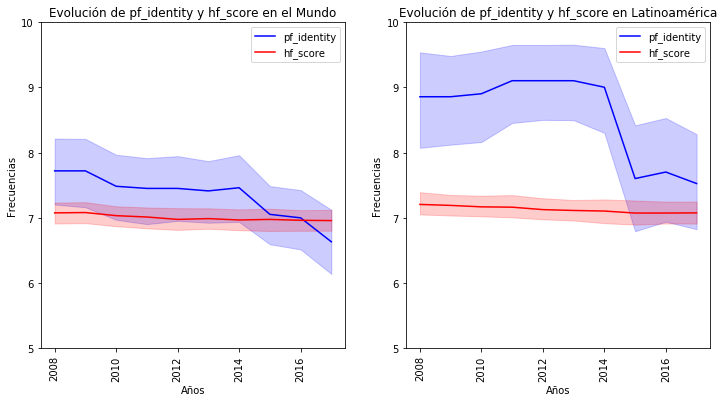

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(12,6))

plt.subplot(121)
p1= seaborn.lineplot(data=dataset_clean, x='year', y='pf_identity', estimator=np.mean, color='blue', label='pf_identity')
seaborn.lineplot(data=dataset_clean, x='year', y='hf_score', estimator=numpy.mean, color='red',
                 label='hf_score')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(5,10)
plt.title('Evolución de pf_identity y hf_score en el Mundo')

plt.subplot(122)
p2= seaborn.lineplot(data=latam_clean, x='year', y='pf_identity', estimator=np.mean, color='blue',
                     label='pf_identity')
seaborn.lineplot(data=latam_clean, x='year', y='hf_score', estimator=numpy.mean, color='red', label='hf_score')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(5,10)
plt.title('Evolución de pf_identity y hf_score en Latinoamérica')

**NOTA:**   
**a)** En los graficos es posible observar que la variable **pf_idendity** muestra una disminuciín general a nivel mundial. Esta caída en el índice se ve aún más marcada en latam, en los últimos años.   
**b)** A pesar de esta caída, es importante observar que actualmente es más alto el valor de la **media** de **pf_identity** en latam que en el mundo.    
**c)** En cuanto al comportameniendo de la variable **hf_score** se observa un patrón muy similar en ambos gráficos, siendo el valor de **media** para latam y el mundo aproximadamente el mismo, manteniendose durante los años.     
**d)** Nos llama la atención el comportamiento de **pf_identity** ya que hubieramos esperado que aumentara a lo largo del tiempo en vez de disminuir de este modo.

### **2.2** Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?


Text(0.5,1,'hf_score por Regiones')

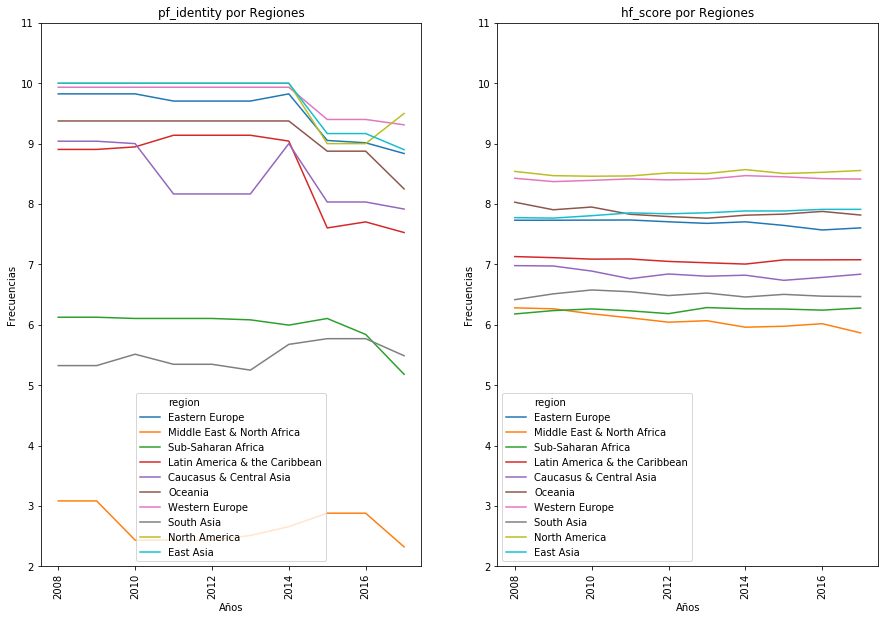

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,10))

plt.subplot(121)
p2= seaborn.lineplot(data=dataset_clean, x='year', y='pf_identity', hue='region', estimator=np.mean, 
                     err_style=None, palette='tab10')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(2,11)
plt.title('pf_identity por Regiones')

plt.subplot(122)
p2= seaborn.lineplot(data=dataset_clean, x='year', y='hf_score', hue='region',estimator=np.mean,
                     err_style=None, palette='tab10')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(2,11)
plt.title('hf_score por Regiones')

**NOTA:**   
**a)** Para **hf_score** la tendencia parece ser la misma dividiendo por regiones o analizando a nivel global.   
**b)** Para **pf_identity** se observan algunas regiones con caidas más marcadas que otras. Incluso para Norteamérica se aprecia que el índice ha subido en los últimos años.

### **2.3** Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

#### Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

#### Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

<Figure size 720x432 with 0 Axes>

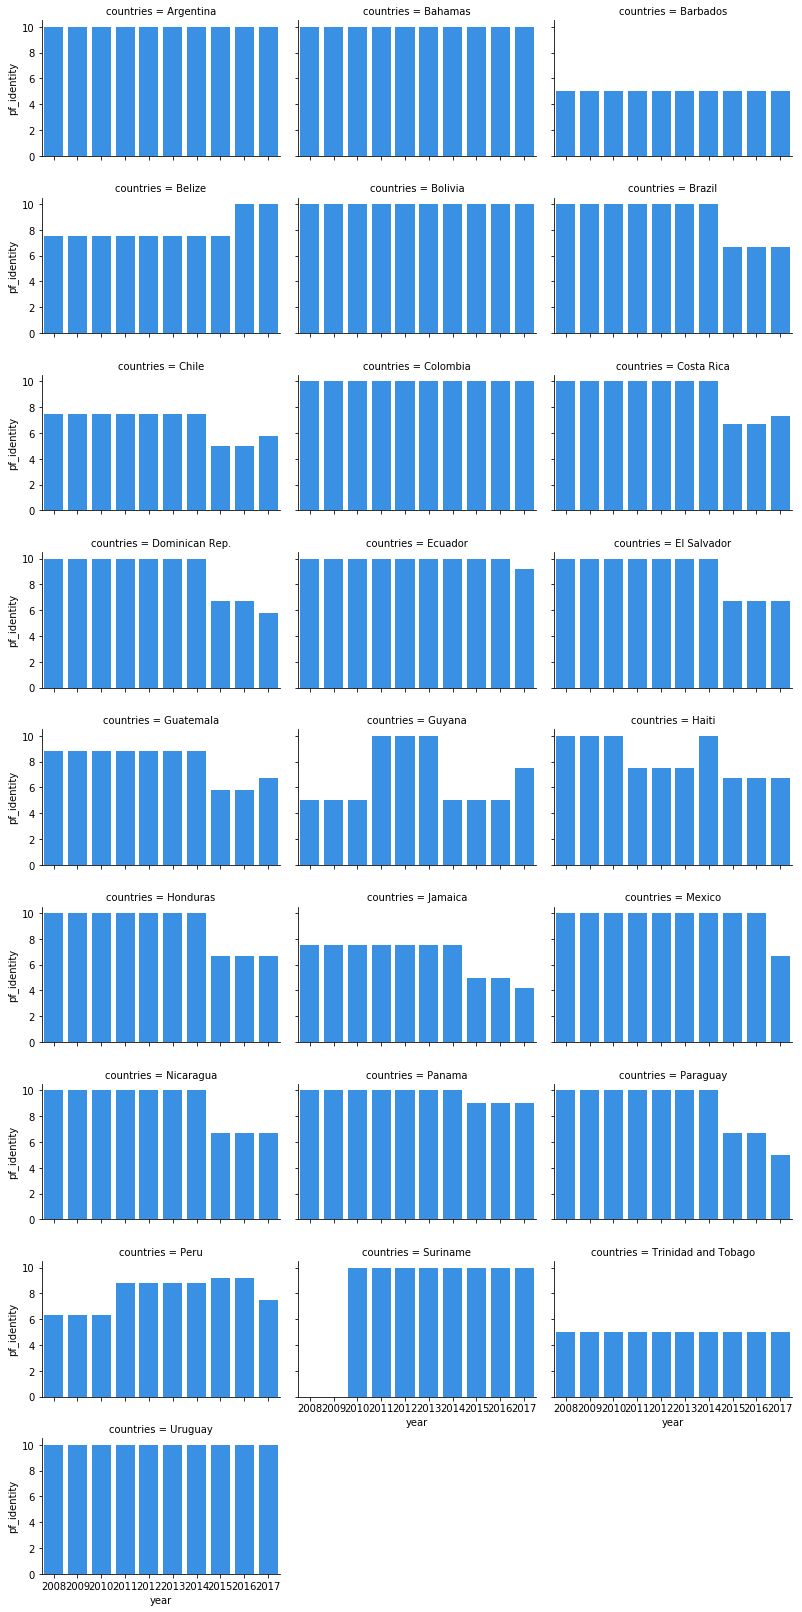

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
g = seaborn.catplot(x="year", y="pf_identity", col="countries", col_wrap=3,
                    data=latam_clean, kind="bar", height=2.5, aspect=1.5, color='dodgerblue', margin_titles=True) 

**NOTA:**     
**a)** Gracias a estos gráfcos podemos ver que la caida del índice **pf_identity** que habíamos detectado en el punto anterior, no se da en todos los países de latam del mismo modo.   
**b)** La mayoría de los paises se mantienen constantes a lo largo del tiempo y muy pocos tienen un leve aumento.    
**c)** SUponemos que la caída general del índice se debe a la suma del efecto producido por la caída de algunos paises y por el hecho de varios paises si bien son constantes, esta constancia es en un valor bajo del índice. Esto lleva a arrastrar la tendencia general del índice hacia abajo.

In [32]:
# Seleccionamos 7 paises para graficar la evolución de los índices hf_score y ef_score

import pandas as pd

latam_select = latam_clean[(latam_clean.countries =='Argentina')]
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Bolivia')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Venezuela')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Chile')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Mexico')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Uruguay')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Panama')]])
latam_select = pd.concat([latam_select, latam_clean[(latam_clean.countries =='Brazil')]])

Text(0.5,1,'ef_score por país de Latam')

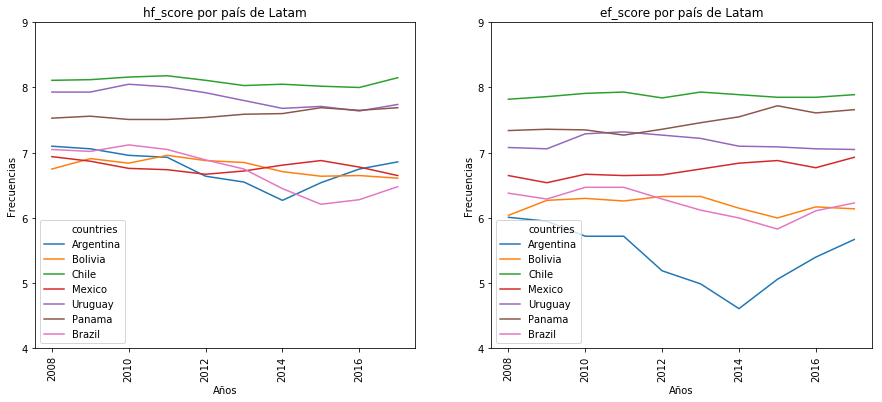

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,6))

plt.subplot(121)
plt1= seaborn.lineplot(data=latam_select, x='year', y='hf_score', hue='countries', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(4,9)
plt.title('hf_score por país de Latam')

plt.subplot(122)
plt2= seaborn.lineplot(data=latam_select, x='year', y='ef_score', hue='countries', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.ylim(4,9)
plt.title('ef_score por país de Latam')

**NOTA:**     
**a)** Observamos que la tendencia de **hf_score** se mantiene bastante constante en algunos paises a lo largo de los años. Excepto para Argentina y Brasil.   
**b)** En cuanto al índice **ef_score** (índice de libertad económica) observamos que mientra la mayoría de los paises mantiene una tendencia similar de comportamiento, Argentina muestra una caída muy notable del mismo, llegando a su punto más bajo en 2014. Esta caida del índice de libertad economica se debe a las políticas económicas restrictivas de gobierno tomadas en esos años como: el control de capitales, la fijacion de precios, la restriccion de importaciones,la nacionalizaciones de empresas, etc. 

## **3. Distribuciones**
### **3.1** Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


Text(0.5,1,'Histograma de distribución de hf_score')

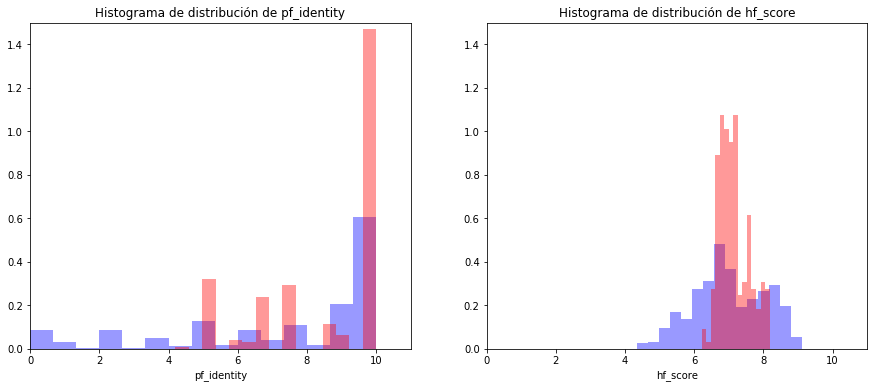

In [34]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(15,6))

plt.subplot(121)
seaborn.distplot(dataset_clean.pf_identity, color='blue', label='Mundial', bins=15, kde=False, norm_hist=True)
seaborn.distplot(latam_clean.pf_identity, color='red', label='Latam', bins=15, kde=False, norm_hist=True)
plt.xlabel('pf_identity')
plt.xlim(0,11)
plt.ylim(0,1.50)
plt.title('Histograma de distribución de pf_identity')

plt.subplot(122)
seaborn.distplot(dataset_clean.hf_score, color='blue', label='Mundial', bins=15, kde=False, norm_hist=True)
seaborn.distplot(latam_clean.hf_score, color='red', label='Latam', bins=15, kde=False, norm_hist=True)
plt.xlabel('hf_score')
plt.xlim(0,11)
plt.ylim(0,1.50)
plt.title('Histograma de distribución de hf_score')

**NOTA:**     
**a)** **pf_identity**, variable discreta (es un promedio), dist. asimétrica negativa -> distribución hipergeométrica.    
**b)** **hf_score**, variable continua, dist. asimétrica negativa-> distribución logística.

## **4. Correlaciones y Relaciones**

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

### **4.1** ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

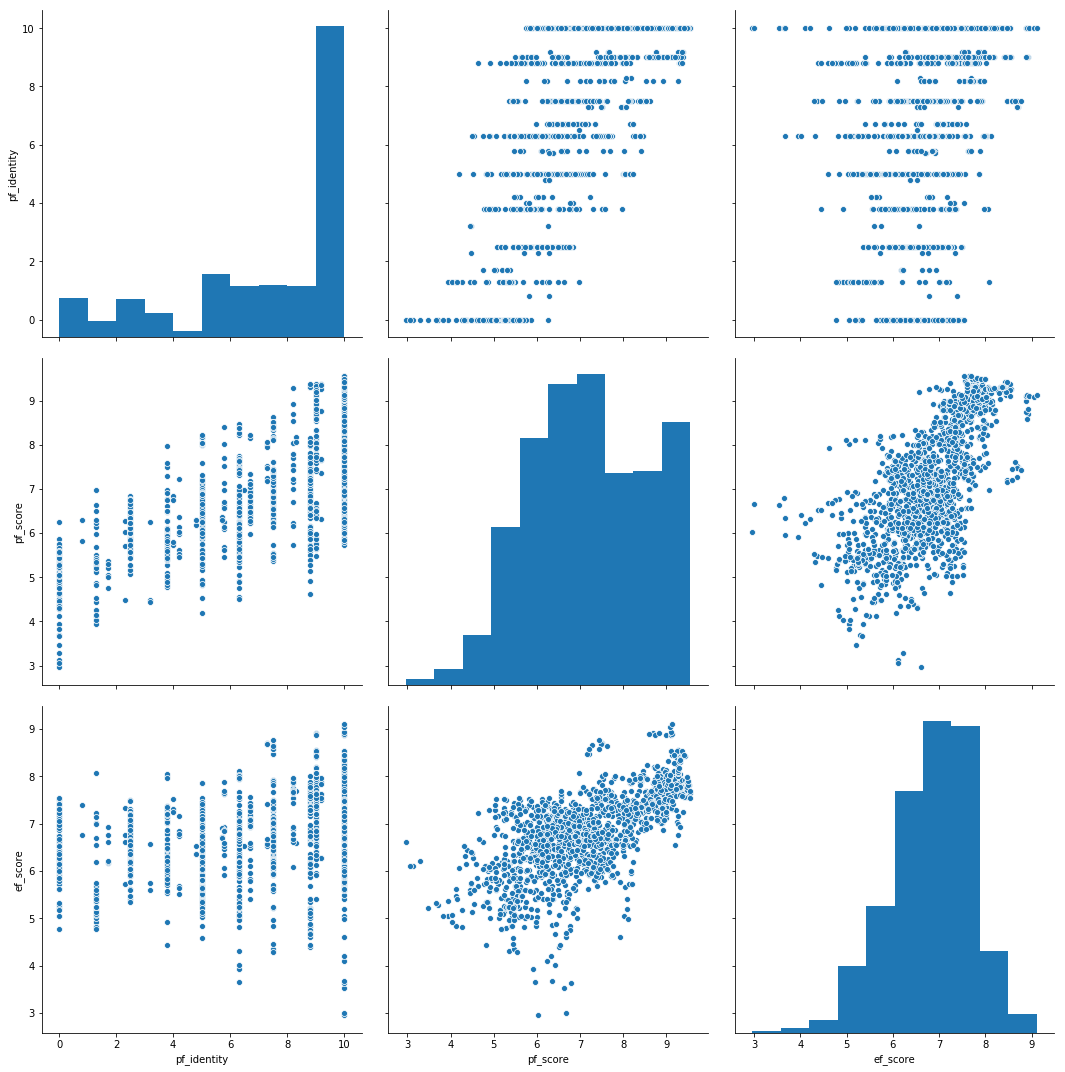

In [35]:
import seaborn

seaborn.pairplot(data=dataset_clean, vars=['pf_identity', 'pf_score', 'ef_score'], height=5)

**NOTA:**    
**a)** Los histogramas de la diagonal principal nos muestran las distribuciones de cada una de las variables analizadas, observandosé que estas están muy sesgadas hacia la izquierda.   
**b)** Los diagramas de dispersión por sobre y debajo de la diagonal nos muestran las relaciones entre dos de las variables. Podemos ver que el **ef_score** y el **pf_score** poseen una *relacion positiva* entre ellos.   
**c)** Este tipo de grafico no sería del todo adecuado para **pf_identity** ya que es una variable discreta(promedio) y este grafico es mejor para variables continuas.

### **4.2** Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.

(0.1, 7.854)

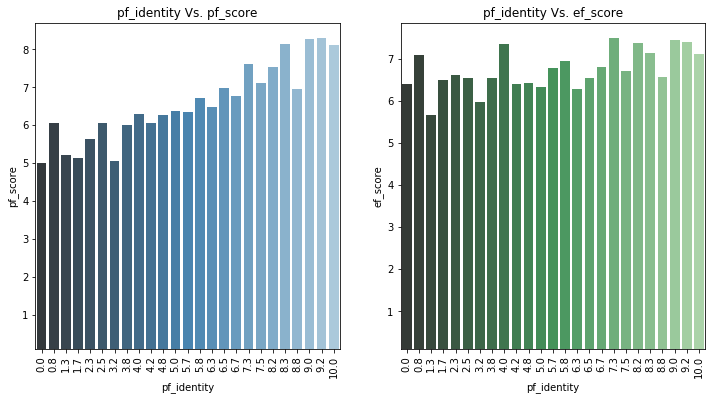

In [36]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(12,6))

plt.subplot(121)
plt1= dataset_clean.pf_identity.value_counts(normalize=True)
seaborn.barplot (x=dataset_clean.pf_identity, y=dataset_clean.pf_score, ci=None, palette='Blues_d')
plt.xticks(rotation=90)
plt.title("pf_identity Vs. pf_score")
plt.ylim(0.1)

plt.subplot(122)
plt2= dataset_clean.pf_identity.value_counts(normalize=True)
seaborn.barplot (x=dataset_clean.pf_identity, y=dataset_clean.ef_score, ci=None, palette='Greens_d')
plt.xticks(rotation=90)
plt.title("pf_identity Vs. ef_score")
plt.ylim(0.1)

**NOTA:**     
**a)** Se utilizaron **Gráficos de barra** ya que son óptimos para variables numéricas discretas como lo es **pf_identity**  
**b)** En estos gráficos se aprecia una tendencia a un *correlación positiva* entre **pf_identity** y **pf_score**, lo que indica que a medida que aumenta una variable también lo hace la otra.    
**c)** En cuanto a **pf_identity** Vs **ef_score** no se observa una *correlación* entre ambas.

### **4.3** Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.

In [37]:
dataset_cut= dataset_clean
dataset_cut['pf_identity_segment'] = pandas.qcut(dataset_clean.pf_identity.rank(method='first'), 3, labels=["high", "medium", "low"])
dataset_cut['pf_score_segment'] = pandas.qcut(dataset_clean.pf_score.rank(method='first'), 3, labels=["high", "medium", "low"])
dataset_cut['ef_score_segment'] = pandas.qcut(dataset_clean.ef_score.rank(method='first'), 3, labels=["high", "medium", "low"])

important_cols_cut = ['region', 'countries', 'pf_identity_segment','pf_score_segment','ef_score_segment']
dataset_cut[important_cols_cut][:10]

C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\W10\miniconda3\envs\diplodatos-ayvd\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,region,countries,pf_identity_segment,pf_score_segment,ef_score_segment
0,Eastern Europe,Albania,high,low,low
1,Middle East & North Africa,Algeria,high,high,high
2,Sub-Saharan Africa,Angola,high,high,high
3,Latin America & the Caribbean,Argentina,medium,low,high
4,Caucasus & Central Asia,Armenia,medium,medium,low
5,Oceania,Australia,medium,low,low
6,Western Europe,Austria,medium,low,low
7,Caucasus & Central Asia,Azerbaijan,high,high,high
8,Latin America & the Caribbean,Bahamas,medium,low,medium
9,Middle East & North Africa,Bahrain,high,high,low


In [38]:
dataset_cut.pf_identity_segment.value_counts()

low       509
medium    509
high      509
Name: pf_identity_segment, dtype: int64

In [39]:
dataset_cut.pf_score_segment.value_counts()

low       509
medium    509
high      509
Name: pf_score_segment, dtype: int64

In [40]:
dataset_cut.ef_score_segment.value_counts()

low       509
medium    509
high      509
Name: ef_score_segment, dtype: int64

**NOTA:**      
**a)** Observamos que para las tres variables, la cantidad de valores por inteérvalos 'hight','medium' y 'low' queda balanceada 

### **4.4** Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

Text(0.5,1,'pf_score Vs ef_score')

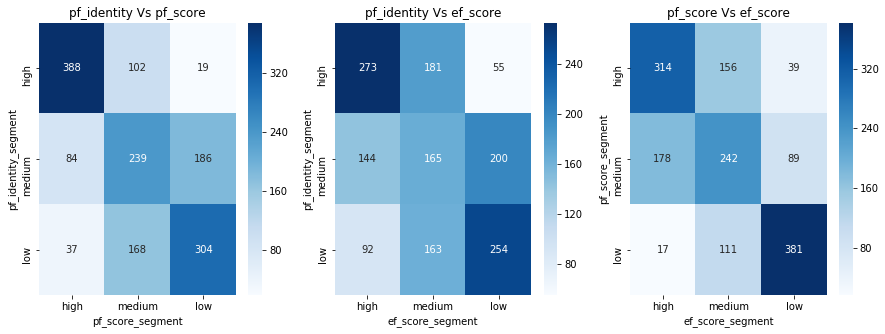

In [41]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(15,5))

plt.subplot(131)
plt1 = pandas.crosstab(dataset_cut.pf_identity_segment, dataset_cut.pf_score_segment)
seaborn.heatmap(plt1, annot=True, fmt='g',cmap='Blues')
plt.ylabel('pf_identity_segment')
plt.xlabel('pf_score_segment')
plt.title('pf_identity Vs pf_score')

plt.subplot(132)
plt2 = pandas.crosstab(dataset_cut.pf_identity_segment, dataset_cut.ef_score_segment)
seaborn.heatmap(plt2, annot=True, fmt='g',cmap='Blues')
plt.ylabel('pf_identity_segment')
plt.xlabel('ef_score_segment')
plt.title('pf_identity Vs ef_score')

plt.subplot(133)
plt3 = pandas.crosstab(dataset_cut.pf_score_segment, dataset_cut.ef_score_segment)
seaborn.heatmap(plt3, annot=True, fmt='g',cmap='Blues')
plt.ylabel('pf_score_segment')
plt.xlabel('ef_score_segment')
plt.title('pf_score Vs ef_score')

**NOTA:**    
**a)** Los **heatmaps** son muy útiles para graficar la relación entre **variables categóricas**   
**b)** En estos gráficos podemos observar que mientras una variable disminuye, la otra también lo hace, pero no llega a ver del todo una correlación positiva.

# **Parte 2**

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## **3. Distribuciones**
### **3.1** Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. 
Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [42]:
# 1- PLANTEO DE HIPÓTESIS
# Ho= distribución de la variable = normal
# Hi = distribución de la variable != normal

# 2- ESTABLECIMIENTO DEL NIVEL DE SIGNIFICANCIA DEL TEST 
# nivel de significancia (alfa)=0.05
# nivel de confianza (1-alfa)=0.95

# 3- ELECCIÓN DEL TEST
# Test de Kolmogorov-Smirnof -> contrasta la distribución de mi variable, con una distribución normal

# 4- REGLA DE DECISIÓN
# p-valor < alfa = Rechazo Ho

In [52]:
media_pf, desviacion_pf = scipy.stats.norm.fit(dataset_clean["pf_identity"])
media_pfs, desviacion_pfs = scipy.stats.norm.fit(dataset_clean["pf_score"])
media_ef, desviacion_ef = scipy.stats.norm.fit(dataset_clean["ef_score"])
media_hf, desviacion_hf = scipy.stats.norm.fit(latam_clean["hf_score"])

print('ESTADÍSTICOS DESCRIPTIVOS PARA MUNDO')
print('Hipotesis Nula pf_identity a nivel Mundial es normal con Media = '+ str(media_pf) + ' Dev.Est. = '+ str(desviacion_pf))
print('Hipotesis Nula pf_score a nivel Mundial es normal con Media = '+ str(media_pfs) + ' Dev.Est. = '+ str(desviacion_pfs))
print('Hipotesis Nula ef_score a nivel Mundial es normal con Media = '+ str(media_ef) + ' Dev.Est. = '+ str(desviacion_ef))
print('Hipotesis Nula hf_score a nivel Mundial es normal con Media = '+ str(media_hf) + ' Dev.Est. = '+ str(desviacion_hf))

ESTADÍSTICOS DESCRIPTIVOS PARA MUNDO
Hipotesis Nula pf_identity a nivel Mundial es normal con Media = 7.331106745252128 Dev.Est. = 3.137776298267647
Hipotesis Nula pf_score a nivel Mundial es normal con Media = 7.194754420432219 Dev.Est. = 1.3515005323240081
Hipotesis Nula ef_score a nivel Mundial es normal con Media = 6.811787819253438 Dev.Est. = 0.88016743185033
Hipotesis Nula hf_score a nivel Mundial es normal con Media = 7.130725806451612 Dev.Est. = 0.4246111568191742


In [53]:
# Normalizamos los datos para comparar con la distribucion normal
# Usamos la media y la desviación estandar propia de cada variable

#scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')

d_pf, pvalor_pf = scipy.stats.kstest(dataset_clean["pf_identity"],"norm",args=(media_pf,desviacion_pf))
d_pfs, pvalor_pfs = scipy.stats.kstest(dataset_clean["pf_score"],"norm",args=(media_pfs,desviacion_pfs))
d_ef, pvalor_ef = scipy.stats.kstest(dataset_clean["ef_score"],"norm",args=(media_ef,desviacion_ef))
d_hf, pvalor_hf = scipy.stats.kstest(dataset_clean["hf_score"],"norm",args=(media_hf,desviacion_hf))

if pvalor_pf < 0.05:
    print("Se rechaza H0 porque PF_IDENTITY No se ajusta a una normal, p-value=" + str(format(pvalor_pf, '.8f')))
else:
    print("No se rechaza H0 porque PF_IDENTITY Se puede ajustar a una normal, p-value=" + str(format(pvalor_pf, '.8f')))
    
if pvalor_pfs < 0.05:
     print("Se rechaza H0 porque PF_SCORE No se ajusta a una normal, p-value=" + str(format(pvalor_pfs, '.8f')))
else:
    print("No se rechaza H0 porque PF_SCORE Se puede ajustar a una normal, p-value=" + str(format(pvalor_pfs, '.8f')))
    
if pvalor_ef < 0.05:
     print("Se rechaza H0 porque EF_SCORE No se ajusta a una normal, p-value=" + str(format(pvalor_ef, '.8f')))
else:
    print("No se rechaza H0 porque EF_SCORE Se puede ajustar a una normal, p-value=" + str(format(pvalor_ef, '.8f')))
    
if pvalor_hf < 0.05:
    print("Se rechaza H0 porque HF_SCORE No se ajusta a una normal, p-value=" + str(format(pvalor_hf, '.8f')))
else:
    print("No se rechaza H0 porque HF_SCORE Se puede ajustar a una normal, p-value=" + str(format(pvalor_hf, '.8f')))

Se rechaza H0 porque PF_IDENTITY No se ajusta a una normal, p-value=0.00000000
Se rechaza H0 porque PF_SCORE No se ajusta a una normal, p-value=0.00000009
Se rechaza H0 porque EF_SCORE No se ajusta a una normal, p-value=0.00075929
Se rechaza H0 porque HF_SCORE No se ajusta a una normal, p-value=0.00000000


**NOTA**    
**a)** Rechazamos las Ho de las cuatro variables   
**b)** Las tres variables analizadas, no poseen una distribución normal

## **4. Correlaciones**

### **4.1** Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. 
Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

**NOTA:**        
**a)** **pf_identity**, variable discreta (es un promedio)    
**b)** **pf_score**, variable continua    
**c)** **ef_score**, variable continua   

In [70]:
import scipy
from scipy import stats

# Coeficiente de Kendall (Tau) 

# Ho -> Las variables son independientes, no hay correlación
# nivel de significancia (alfa)=0.05
# p-valor < alfa = Rechazo Ho

coef_tk, p_value_tk = scipy.stats.kendalltau(dataset_cut['pf_score_segment'],dataset_cut['pf_identity_segment'])
print('pf_identity_segment Vs. pf_score_segment-> coef_tk= ',coef_tk)
print('pf_identity_segment Vs. pf_score_segment-> p-value= %.5f'% p_value_tk)

pf_identity_segment Vs. pf_score_segment-> coef_tk=  0.3970868827380884
pf_identity_segment Vs. pf_score_segment-> p-value= 0.00000


In [71]:
coef_tk, p_value_tk = scipy.stats.kendalltau(dataset_cut['ef_score_segment'],dataset_cut['pf_identity_segment'])
print('pf_identity_segment Vs. ef_score_segment-> coef_tk= ',coef_tk)
print('pf_identity_segment Vs. ef_score_segment-> p-value= %.5f'% p_value_tk)

pf_identity_segment Vs. ef_score_segment-> coef_tk=  0.09842224375131074
pf_identity_segment Vs. ef_score_segment-> p-value= 0.00002


In [72]:
coef_tk, p_value_tk = scipy.stats.kendalltau(dataset_cut['pf_score_segment'],dataset_cut['pf_identity_segment'])
print('pf_identitiy_segment Vs. pf_score_segment-> coef_tk= ',coef_tk)
print('pf_identity_segment Vs. pf_score_segment-> p-value= %.5f'% p_value_tk)

pf_identitiy_segment Vs. pf_score_segment-> coef_tk=  0.3970868827380884
pf_identity_segment Vs. pf_score_segment-> p-value= 0.00000


In [73]:
coef_tk, p_value_tk = scipy.stats.kendalltau(dataset_cut['pf_score_segment'],dataset_cut['ef_score_segment'])
print('ef_score_segment Vs. pf_score_segment-> coef_tk= ',coef_tk)
print('ef_score_segment Vs. pf_score_segment-> p-value= %.5f'% p_value_tk)

ef_score_segment Vs. pf_score_segment-> coef_tk=  0.20742290377655384
ef_score_segment Vs. pf_score_segment-> p-value= 0.00000


**NOTA:**  Calculando el Coeficiente de Kendall obtenemos;  
**a)** Existe correlacion entre todos los pares de variables analizados   
**b)** Era un resultado esperado ya que pf_indentity contribuye al cálculo de pf_score 

In [ ]:
import scipy
from scipy import stats

# Coeficiente de Spearman (rho) 

# Ho -> Las variables son independientes, no hay correlación
# nivel de significancia (alfa)=0.05
# p-valor < alfa = Rechazo Ho

In [87]:
coef_rho, p_value_rho = scipy.stats.spearmanr(dataset_clean['pf_score'],dataset_clean['pf_identity'])
print('pf_identity Vs. pf_score-> coef_rho= ',coef_rho)
print('pf_identity Vs. pf_score-> p-value= %.5f'% p_value_rho)

pf_identity Vs. pf_score-> coef_rho=  0.7255168541969753
pf_identity Vs. pf_score-> p-value= 0.00000


In [88]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['ef_score'],dataset_clean['pf_identity'])
print('pf_identity Vs. ef_score-> coef_rho= ',coef_rho)
print('pf_identity Vs. ef_score-> p-value= %.5f'% p_value_rho)

pf_identity Vs. ef_score-> coef_rho=  0.3900841997769669
pf_identity Vs. ef_score-> p-value= 0.00000


In [89]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['ef_score'],dataset_clean['pf_score'])
print('pf_score Vs. ef_score-> coef_rho= ',coef_rho)
print('pf_score Vs. ef_score-> p-value= %.5f'% p_value_rho)

pf_score Vs. ef_score-> coef_rho=  0.7050126396310707
pf_score Vs. ef_score-> p-value= 0.00000


In [90]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['hf_score'],dataset_clean['pf_identity'])
print('pf_identity Vs. hf_score-> coef_rho= ',coef_rho)
print('pf_identity Vs. hf_score-> p-value= %.5f'% p_value_rho)

pf_identity Vs. hf_score-> coef_rho=  0.6421734701660134
pf_identity Vs. hf_score-> p-value= 0.00000


In [91]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['hf_score'],dataset_clean['pf_score'])
print('pf_score Vs. hf_score-> coef_rho= ',coef_rho)
print('pf_score Vs. hf_score-> p-value= %.5f'% p_value_rho)

pf_score Vs. hf_score-> coef_rho=  0.9501051844073091
pf_score Vs. hf_score-> p-value= 0.00000


In [92]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['hf_score'],dataset_clean['ef_score'])
print('ef_score Vs. hf_score-> coef_rho= ',coef_rho)
print('ef_score Vs. hf_score-> p-value= %.5f'% p_value_rho)

ef_score Vs. hf_score-> coef_rho=  0.8782131985383576
ef_score Vs. hf_score-> p-value= 0.00000


In [93]:
coef_rho, p_value_rho  = scipy.stats.spearmanr(dataset_clean['hf_score'],dataset_clean['ef_score'])
print('ef_score Vs. hf_score-> coef_rho= ',coef_rho)
print('ef_score Vs. hf_score-> p-value= %.5f'% p_value_rho)

ef_score Vs. hf_score-> coef_rho=  0.8782131985383576
ef_score Vs. hf_score-> p-value= 0.00000


**NOTA:**  Calculando el Coeficiente de Spearman obtenemos;   
**a)** Existe correlacion entre todos los pares de variables analizados   

### **4.2** [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. 
El test Tau-Kendall es para variables ordinales o rankings, así que no se aplica a region. Hay dos opciones, o hacen un test para correlación de categóricas, o usan otro par de variable que se pueda hacer ordinal usando pandas.cut y aplican Kendall. Lo que les parezca más interesante de resolver.


Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.    
Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?

In [103]:
import pandas

# Coeficiente de Chi cuadrado

# Ho -> Las variables son independientes, no hay correlación
# nivel de significancia (alfa)=0.05
# p-valor < alfa = Rechazo Ho

# Tabla de contingencia 
dataset_ct_pf = pandas.crosstab(index=dataset_clean['region'], columns=dataset_cut['pf_score_segment'])
print(dataset_ct_pf)

pf_score_segment               high  medium  low
region                                          
Caucasus & Central Asia          24      32    2
East Asia                        10       4   46
Eastern Europe                   13      41  158
Latin America & the Caribbean    14     181   60
Middle East & North Africa      139      17    4
North America                     0       0   20
Oceania                           0      18   22
South Asia                       84      68    1
Sub-Saharan Africa              225     148   16
Western Europe                    0       0  180


In [96]:
chi2_result,p_value,df_value,table_expected=scipy.stats.chi2_contingency(dataset_ct_pf)

In [105]:
confidence_level = 0.95
crit_value = scipy.stats.chi2.ppf(q = confidence_level, df=df_value)
print()
print ('Tabla de Contingencia')
print ('====================================')
print ('chi2:', chi2_result)
print ('p-value= %.5f'% p_value)
print ('df = ', df_value)
print('Valor Crítico: ',crit_value)


Tabla de Contingencia
chi2: 1296.0418895502582
p-value= 0.00000
df =  18
Valor Crítico:  28.869299430392623


**NOTA:**    
**a)** Rechazamos la Ho, por lo tanto hay una correlación entre la variable pf_score_segment y la región.